In [1]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Инициализация фигуры для общего графика

colors = {
    "en-ru": "blue",
    "en-fr": "teal",
    "en-hi": "black",
    "en-ar": "purple",
    "en-es": "brown",
    "en-it": "navy"
}

markers = {
    "en-ru": "v",
    "en-fr": "X",
    "en-hi": "8",
    "en-ar": "s",
    "en-es": "d",
    "en-it": "D"
}

In [2]:
Readme_1_2 = pd.read_csv('./parallel/ANC_Readme_1_2.txt', sep=';')
# Преобразование строки со значениями в список чисел
Readme_1_2['Value'] = Readme_1_2['Value'].apply(ast.literal_eval)

# Подготовка данных для построения графиков
data_Readme_1_2_by_pair = Readme_1_2.groupby('Language Pair')['Value'].apply(list)

Readme_3_4 = pd.read_csv('./parallel/ANC_Readme_3_4.txt', sep=';')
# Преобразование строки со значениями в список чисел
Readme_3_4['Value'] = Readme_3_4['Value'].apply(ast.literal_eval)

# Подготовка данных для построения графиков
data_Readme_3_4_by_pair = Readme_3_4.groupby('Language Pair')['Value'].apply(list)

Readme_5_6 = pd.read_csv('./parallel/ANC_Readme_5_6.txt', sep=';')
# Преобразование строки со значениями в список чисел
Readme_5_6['Value'] = Readme_5_6['Value'].apply(ast.literal_eval)

# Подготовка данных для построения графиков
data_Readme_5_6_by_pair = Readme_5_6.groupby('Language Pair')['Value'].apply(list)

data_dict_ANC = {'Readme_1_2': data_Readme_1_2_by_pair, 'Readme_3_4': data_Readme_3_4_by_pair, 'Readme_5_6': data_Readme_5_6_by_pair}

Readme_1_2 = pd.read_csv('./parallel/wasserstein_Readme_1_2.txt', sep=';')
# Преобразование строки со значениями в список чисел
Readme_1_2['Value'] = Readme_1_2['Value'].apply(ast.literal_eval)

# Подготовка данных для построения графиков
data_Readme_1_2_by_pair = Readme_1_2.groupby('Language Pair')['Value'].apply(list)

Readme_3_4 = pd.read_csv('./parallel/wasserstein_Readme_3_4.txt', sep=';')
# Преобразование строки со значениями в список чисел
Readme_3_4['Value'] = Readme_3_4['Value'].apply(ast.literal_eval)

# Подготовка данных для построения графиков
data_Readme_3_4_by_pair = Readme_3_4.groupby('Language Pair')['Value'].apply(list)

Readme_5_6 = pd.read_csv('./parallel/wasserstein_Readme_5_6.txt', sep=';')
# Преобразование строки со значениями в список чисел
Readme_5_6['Value'] = Readme_5_6['Value'].apply(ast.literal_eval)

# Подготовка данных для построения графиков
data_Readme_5_6_by_pair = Readme_5_6.groupby('Language Pair')['Value'].apply(list)


data_dict_wasserstein = {'XNLI': data_Readme_1_2_by_pair, 'Readme++': data_Readme_3_4_by_pair, 'Vikidia vs Wikipedia': data_Readme_5_6_by_pair}

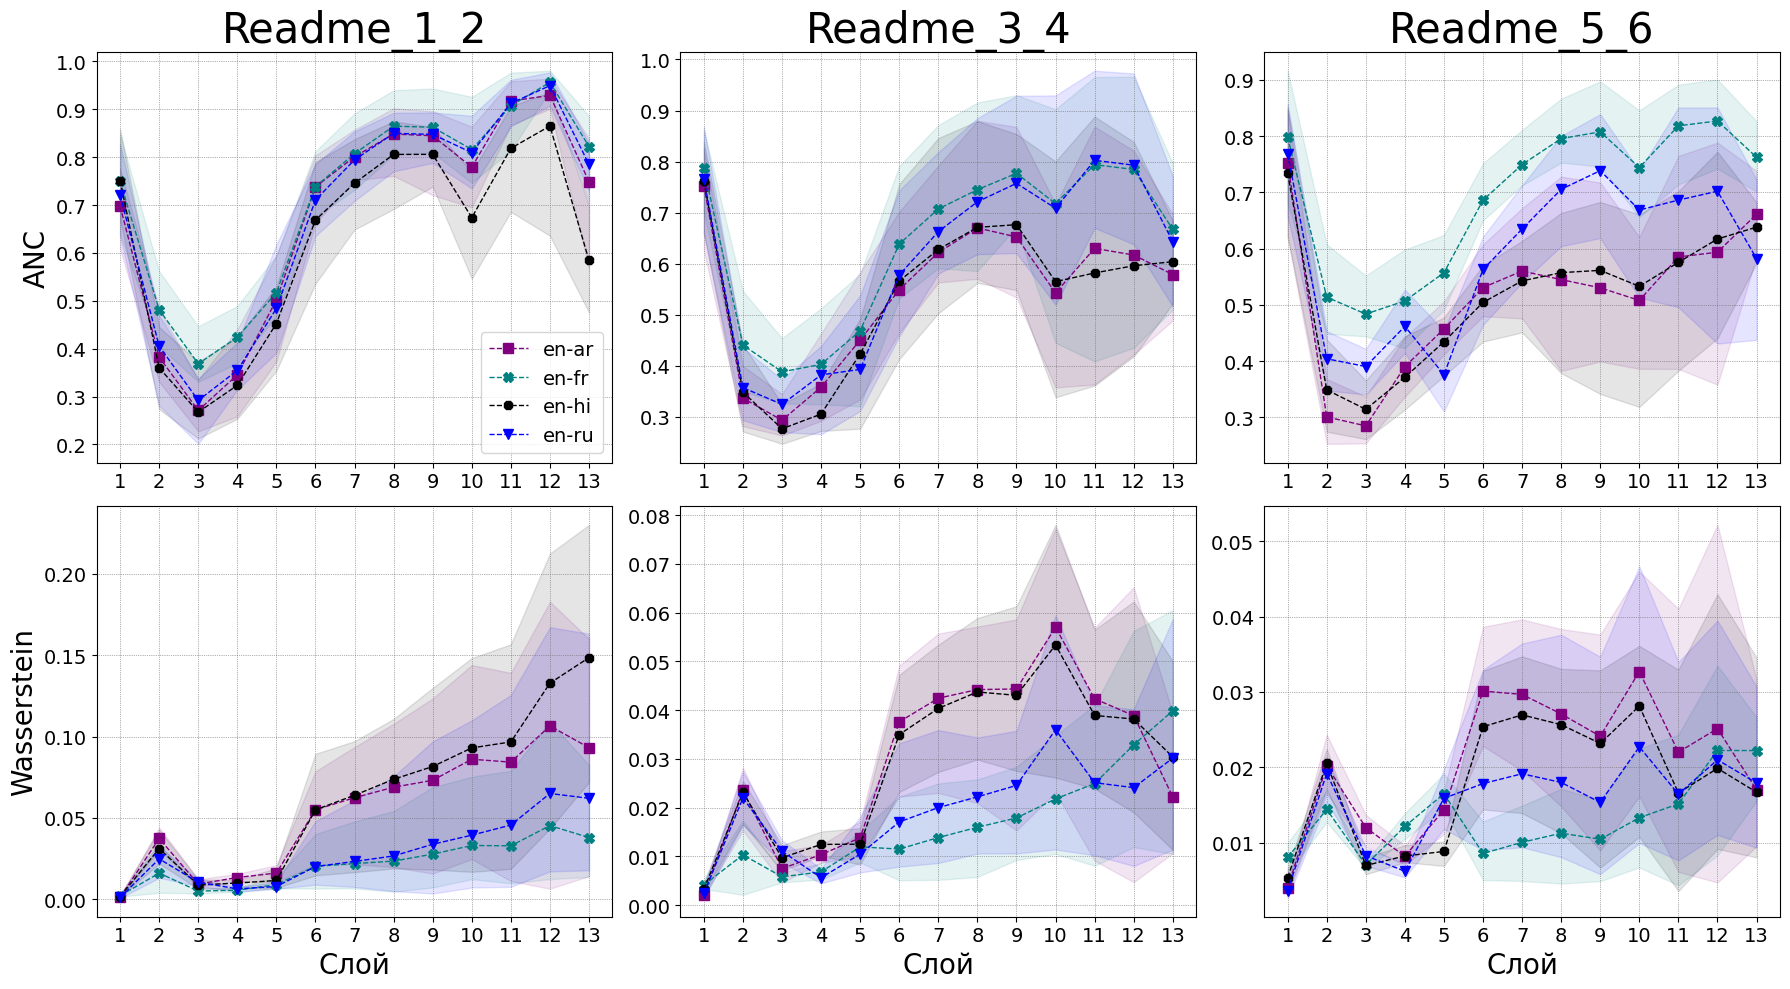

In [3]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Пример итерации по трем различным наборам данных
for idx, (data_key, data_value) in enumerate(data_dict_ANC.items()):
    # Выбор текущей оси
    ax = axs[0, idx]

    # Построение графика на текущей оси
    for (lang_pair, values) in data_value.items():
        values_array = np.array(values)
        min_values = values_array.min(axis=0)
        max_values = values_array.max(axis=0)
        mean_values = values_array.mean(axis=0)
        x = range(1, len(mean_values)+1)
        color = colors.get(lang_pair, "grey")
        marker = markers.get(lang_pair, "*")
        
        ax.plot(x, mean_values, marker=marker, markersize=7, label=f'{lang_pair}', color=color, linewidth=1, linestyle='--')
        ax.fill_between(x, min_values, max_values, color=color, alpha=0.1)

    ax.set_title(data_key, size=30)
    #ax.set_xlabel('Слой', size=20)
    if idx == 0:
        ax.set_ylabel('ANC', size=20)
        ax.legend(fontsize=14)
    ax.set_xticks(range(1, len(mean_values) + 1))
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)


# Пример итерации по трем различным наборам данных
for idx, (data_key, data_value) in enumerate(data_dict_wasserstein.items()):
    # Выбор текущей оси
    ax = axs[1, idx]

    # Построение графика на текущей оси
    for (lang_pair, values) in data_value.items():
        values_array = np.array(values)
        min_values = values_array.min(axis=0)
        max_values = values_array.max(axis=0)
        mean_values = values_array.mean(axis=0)
        x = range(1, len(mean_values)+1)
        color = colors.get(lang_pair, "grey")
        marker = markers.get(lang_pair, "*")
        
        ax.plot(x, mean_values, marker=marker, markersize=7, label=f'{lang_pair}', color=color, linewidth=1, linestyle='--')
        ax.fill_between(x, min_values, max_values, color=color, alpha=0.1)

    #ax.set_title(data_key, size=30)
    ax.set_xlabel('Слой', size=20)
    if idx == 0:
        ax.set_ylabel('Wasserstein', size=20)
        #ax.legend(fontsize=14)
    ax.set_xticks(range(1, len(mean_values) + 1))
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()
